In [2]:
#import necessary libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [3]:
#import tensorflow and keras
import tensorflow as tf
from tensorflow import keras

In [4]:
#assign image directory to variable
train_dir = r'data\train'
test_dir = r'data\test'
validation_dir = r'data\validation'

In [5]:
#preprocess images
#note that the images are not all the same size
# and they are colored
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
#get the image
#rescale the image to be between 0 and 1 hence the 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

#generate the images
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
#import layers and model from keras
from tensorflow.keras import layers
from tensorflow.keras import models

In [8]:
#build the model: CNN
model = models.Sequential()

#add layers using the genral practive of doubling con layer filters
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
#get a summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [11]:
#compile the model
model.compile(loss='binary_crossentropy',
                optimizer=keras.optimizers.RMSprop(learning_rate=1e-4),
                metrics=['acc'])

In [12]:
#fit the model
history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=20,
        validation_data=validation_generator,
        validation_steps=50)

C:\Users\DELL\AppData\Local\Temp\ipykernel_9864\1368726291.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/20
100/100 [==============================] - 148s 1s/step - loss: 0.6898 - acc: 0.5295 - val_loss: 0.7273 - val_acc: 0.5000
Epoch 2/20
100/100 [==============================] - 122s 1s/step - loss: 0.6731 - acc: 0.5700 - val_loss: 0.6560 - val_acc: 0.6140
Epoch 3/20
100/100 [==============================] - 103s 1s/step - loss: 0.6397 - acc: 0.6335 - val_loss: 0.6294 - val_acc: 0.6430
Epoch 4/20
100/100 [==============================] - 82s 818ms/step - loss: 0.6041 - acc: 0.6645 - val_loss: 0.6112 - val_acc: 0.6580
Epoch 5/20
100/100 [==============================] - 98s 977ms/step - loss: 0.5749 - acc: 0.6895 - val_loss: 0.6323 - val_acc: 0.6240
Epoch 6/20
100/100 [==============================] - 87s 872ms/step - loss: 0.5552 - acc: 0.7075 - val_loss: 0.6745 - val_acc: 0.6390
Epoch 7/20
100/100 [==============================] - 87s 867ms/step - loss: 0.5284 - acc: 0.7360 - val_loss: 0.5932 - val_acc: 0.6690
Epoch 8/20
100/100 [==============================] - 83s 830

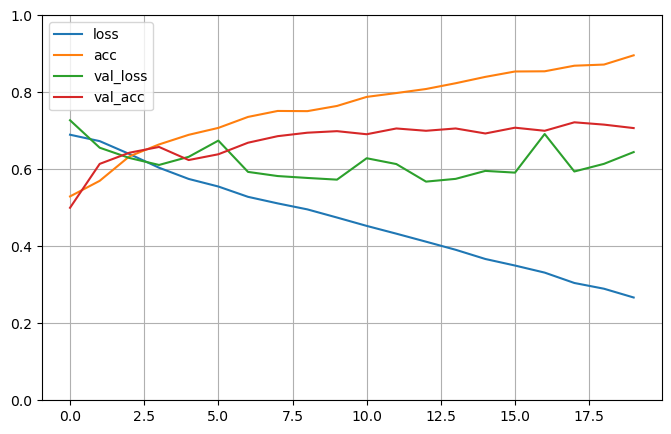

In [13]:
#plot the accuracy values
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
#space between training and validation shows overfitting exists

In [14]:
#save the model
model.save('model.h5')

In [15]:
#import library to clear session
import keras.backend as K

#clear session to free up memory
K.clear_session()
del model